# CNN with Tensorflow|Keras for Fashion MNIST
![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)

## Dataset
Fashion-MNIST 是 Zalando 文章图像的数据集，由 60,000 个示例的训练集和 10,000 个示例的测试集组成。每个示例都是一个 28x28 的灰度图像，与 10 个类的标签相关联。Zalando 希望 Fashion-MNIST 作为原始 MNIST 数据集的直接替代品，用于对机器学习算法进行基准测试。它共享相同的图像大小以及训练和测试拆分的结构。

## Content
每张图像的高度为 28 像素，宽度为 28 像素，总共 784 像素。

每个像素都有一个与之关联的像素值，表示该像素的亮度或暗度，数字越大表示越暗。此像素值是介于 0 和 255 之间的整数。

训练和测试数据集有 785 列。

第一列由类标签（见上文）组成，代表服装物品。

其余 784 列 （1-785） 包含关联图像的像素值。

## CNN
## 理解CNN模型的基本概念：

图像处理的第一步是要理解如何表示图像，以便机器能够读取它？

每幅图像都是由点（像素）的累积排列组成的，在特殊顺序中排列。如果改变像素的顺序或颜色，图像也会随之改变。

三个基本组件来定义基本卷积神经网络。

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)
三个基本组件来定义基本卷积神经网络。

### 卷积层
### 池化层
### 输出层

让我们看看它们的细节

### 卷积层：

在这一层中，如果我们有一个大小为6* 6的图像。我们定义一个权重矩阵，它从图像中提取某些特征
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28010254/conv1.png)
我们已经初始化了3* 3的权重矩阵。现在，该权重将沿着图像运行，以至少一次覆盖所有像素，以给出一个卷积输出。上面的值429是通过将权重矩阵和输入图像的突出显示的3* 3部分进行元素乘法获得的。
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28011851/conv.gif)
6* 6图像现在转换为4* 4图像。把权重矩阵想象成一把油漆刷刷墙。刷子首先水平刷墙，然后向下移动，然后水平刷下一行。当权重矩阵沿图像移动时，像素值再次被使用。这基本上实现了卷积神经网络中的参数共享。

* 权重矩阵在图像中的行为类似于过滤器，在原始图像矩阵中提取特定信息。
* 一个权重组合可能提取边缘，而另一个可能提取特定颜色，而另一个可能只是模糊掉不需要的噪音。
* 权重是根据使损失函数最小化并从原始图像中提取有助于网络正确预测的特征来学习的。
* 当我们使用多个卷积层时，初始层会提取更通用的特征，随着网络变得更深，特征会变得更复杂。

让我们在深入了解之前先了解一些概念

#### 什么是步幅？

如上所示，我们在整个图像上移动滤波器或权重矩阵，每次移动一个像素。如果这是一个超参数，以每次一像素的步幅移动权重矩阵，则称为步幅为1。让我们看看步幅为2时的情况。
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28090227/stride1.gif)

正如我们所看到的，随着步幅值的增加，图像的大小不断减小。

通过在输入图像周围填充零可以解决此问题。在高步幅值的情况下，我们还可以在图像周围添加多层零层。

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28093553/zero-padding.png)

我们可以看到，将图像用零填充后，保留了图像的初始形状。这被称为相同的填充，因为输出图像的大小与输入相同。
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28094927/padding.gif)
这被称为相同填充（这意味着我们只考虑输入图像的有效像素）。中间的4*4像素将保持不变。在这里，我们保留了边界更多的信息，并且还保留了图像的大小。

#### 使用多个滤波器和激活图

* 权重的深度维度与输入图像的深度维度相同。
* 权重延伸到整个输入图像的深度。
* 使用单个权重矩阵进行卷积将导致具有单个深度维度的卷积输出。在多个滤波器的情况下，所有滤波器都具有相同的尺寸。
* 每个滤波器的输出叠加在一起，形成了卷积图像的深度维度。

假设我们有一个大小为32* 32* 3的输入图像。我们应用大小为5* 5* 3的10个滤波器，使用有效填充。输出的尺寸将为28* 28* 10。

可以将其视为 –
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28113904/activation-map.png)
这个激活图是卷积层的输出。

### 池化层

如果图像很大，我们需要减少可训练参数的数量。为此，我们需要在卷积层之间使用池化层。池化用于减少图像的空间大小，并且在每个深度维度上独立实现，因此图像深度不会改变。最大池化是最常见的池化层形式。
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28022816/maxpool.png)
这里我们将步幅设置为2，同时将池化大小也设置为2。最大操作应用于卷积输出的每个深度维度。正如我们所看到的，4* 4的卷积输出在最大池化操作之后变为了2* 2。

还有其他形式的池化，如平均池化、L2范数池化等。

#### 输出维度

有时候理解每个卷积层结束时的输入和输出维度是有技巧的。为此，我们将使用三个超参数来控制输出体积的大小。

1. 滤波器数量：输出体积的深度将等于应用的滤波器数量。激活图的深度将等于滤波器数量。
2. 步幅 - 当步幅为1时，我们在每次横向和纵向移动一个像素。使用较高的步幅值，我们一次移动大量像素，因此产生较小的输出体积。
3. 零填充 - 这有助于我们保持输入图像的大小。如果添加了单个零填充，单个步幅滤波器移动将保留原始图像的大小。

我们可以应用一个简单的公式来计算输出尺寸。

输出图像的空间尺寸可以计算为 ( [W-F+2P]/S)+1. 
其中, W是输入体积的尺寸，
       F是滤波器的尺寸，
       P是应用的填充数量，
       S是步幅数量
       
让我们举个例子，假设有一个尺寸为64* 64* 3的输入图像，我们应用3* 3* 3大小的10个滤波器，步幅为1，没有零填充。

这里W=64，F=3，P=0，S=1。输出深度将等于应用的滤波器数量，即10。

输出体积的尺寸将为([64-3+0]/1)+1 = 62。因此输出体积将为62* 62* 10。

### 输出层
* 通过多个卷积和填充层，我们需要以类的形式输出。
* 要生成最终输出，我们需要应用一个全连接层，以生成所需类别数的输出。
* 卷积层生成3D激活图，而我们只需要将输出作为图像是否属于特定类别的输出。
* 输出层有一个像分类交叉熵这样的损失函数，用于计算预测中的误差。一旦前向传播完成，反向传播开始更新权重和偏差以减少误差和损失。


### 使用Fashion MNIST数据集来实现CNN模型

![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)
这个数据集是Zalando的服装图片数据集，由60000个训练样本和10000个测试样本组成。每个样本是一个28x28的灰度图像，关联着一个来自10个类别的标签。Fashion-MNIST旨在成为原始MNIST数据集的直接替代品，用于评估机器学习算法的性能。它与原始MNIST数据集具有相同的图像大小和训练/测试集划分。

### 数据描述

* 每个图像的高度和宽度均为28个像素，总共有784个像素。
* 每个像素都有一个与之关联的单个像素值，表示该像素的亮度或暗度，数值越高表示越暗。该像素值是介于0和255之间的整数。
* 训练和测试数据集共有785列。
* 第一列包含类标签（见上文），代表服装类别。
* 其余列包含相关图像的像素值。

要定位图像上的一个像素，假设我们将x分解为x = i * 28 + j，其中i和j是0到27之间的整数。该像素位于28 x 28矩阵的第i行和第j列。

### 获取数据

可以克隆GitHub存储库
   
```bash
git clone git@github.com:zalandoresearch/fashion-mnist.git
```

也可以通过在tf.keras中已经集成了下载与加载Fashion-MNIST数据集的骨架程序,只需要导入与加载数据即可,数据集中的60000图片用于训练网络,10000张图片用于评估经过学习的网络分类图像的准确率

```bash
# 加载数据集
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```
加载完数据集后会返回4个 Numpy 数组

* train_images 和 train_labels 数组是训练集，即模型用于学习的数据,共有60000张
* 测试集 test_images 和 test_labels 数组用于测试模型。共有10000张
* train_images 和 test_images 中都为 28x28 的 NumPy 数组，每个点的值都是介于 0 到 255 之间。代表了当前这张图片 test_images 和test_labels是一个10维的整数数组,每个维度的值都是介于0到9之间。代表了当前图像的标签,这些标签对应于图像代表的服饰所属的类别：

#### 标签
每个训练和测试示例都分配给以下标签之一：

* 0 T-shirt/top 
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

#### 总结

* 每行是一个单独的图像
* 第一列是类标签。
* 剩余的列是像素号（共784个）。
* 每个值表示像素的暗度（1到255）。

## 进行数据处理
### 第一步，导入各种库
导入TensorFlow库：

    import tensorflow as tf：TensorFlow是一个开源的机器学习和深度学习框架。通过导入TensorFlow，我们可以使用其提供的工具和函数来构建和训练神经网络模型。

从TensorFlow中导入Keras模块：

    from tensorflow import keras：Keras是一个高层神经网络API，它简化了深度学习模型的构建和训练过程。TensorFlow内置了Keras，通过导入Keras模块，我们可以更方便地定义、编译和训练神经网络。

导入NumPy库：

    import numpy as np：NumPy是一个用于科学计算的库。它提供了支持大型多维数组和矩阵运算的功能。NumPy在数据处理和预处理中非常有用，例如转换数据格式、进行数值计算等。

导入Matplotlib库的pyplot模块：

    import matplotlib.pyplot as plt：Matplotlib是一个用于数据可视化的库。pyplot模块提供了一组类似于MATLAB的绘图函数，方便我们绘制各种图表和图像。在机器学习中，常用于可视化数据集、展示训练过程中的损失和准确率变化等。

In [1]:
# 导入库
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


### 第二步，加载数据集
加载Fashion MNIST数据集模块：

    fashion_mnist = keras.datasets.fashion_mnist：从Keras库中加载Fashion MNIST数据集模块。Fashion MNIST是一个常用的基准数据集，包含10类不同的服装图片，用于训练和测试图像分类模型。

加载数据集：

    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()：

    fashion_mnist.load_data()：调用load_data方法，加载数据集并将其分成训练集和测试集。

    train_images, train_labels：训练集图像和对应的标签。训练集用于训练模型。

    test_images, test_labels：测试集图像和对应的标签。测试集用于评估模型的性能。

这段代码执行后，train_images和test_images分别包含训练集和测试集的图像数据，train_labels和test_labels分别包含对应的标签。每个图像是28x28像素的灰度图像，标签是0到9之间的整数，分别表示10类不同的服装。

In [2]:
# 加载数据集
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


我们先探索数据集的格式,然后再训练模型。我们先查看一下数据集中的图片的形状

In [3]:
print(train_images.shape)

(60000, 28, 28)


我们再查看一下 数据集中标签的形状

In [4]:
print(train_labels.shape)

(60000,)


### 第三步，对数据进行可视化
创建新的图像：

    plt.figure()：创建一个新的图像窗口或绘图区域。Matplotlib的figure函数用于生成一个新的空白图像。

显示图像：

    plt.imshow(train_images[0])：显示训练集中第一幅图像。train_images[0]是一个28x28的二维数组，表示第一幅训练图像的像素值。imshow函数将这个数组显示为图像。

给子图添加colorbar（颜色条或渐变色条）：

    plt.colorbar()：在图像旁边添加一个颜色条。颜色条显示了图像中的像素值与颜色之间的映射关系，这在显示灰度图像或热图时特别有用。

设置网格线：

    plt.grid(False)：禁用图像上的网格线。默认情况下，imshow可能会在图像上显示网格线，使用grid(False)可以将其关闭，使图像看起来更清晰。

这些步骤一起执行后，将显示训练集中的第一幅图像，并在旁边添加一个颜色条，帮助我们理解图像中不同灰度值对应的颜色。网格线被禁用以提供更清晰的图像展示。




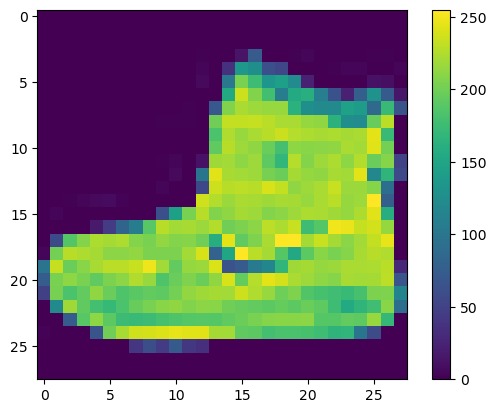

In [5]:
# 可视化
## 创建新的图像
plt.figure()
## 显示图像 (填入图像)
plt.imshow(train_images[0])
## 给子图添加colorbar（颜色条或渐变色条）
plt.colorbar()
## 设置网格线
plt.grid(False)


### 第四步，对数据进行归一化处理

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']：这行代码定义了一个列表，其中包含Fashion MNIST数据集中对应类别标签的类别名称。每个元素的索引与标签值相对应。

打印第一幅图像的标签值：

    print(train_labels[0])：这行代码打印了训练集中第一幅图像的标签值。train_labels是一个包含训练集标签的数组，索引为0表示第一幅图像的标签值。

打印第一幅图像的类别名称：

    print(class_names[train_labels[0]])：这行代码打印了训练集中第一幅图像对应的类别名称。train_labels[0]获取了第一幅图像的标签值，然后通过class_names列表将其转换为对应的类别名称。

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels[0])
print(class_names[train_labels[0]])


9
Ankle boot


归一化训练集图像数据：

    train_images = train_images / 255.0：这行代码将训练集中的图像数据除以255.0进行归一化处理。由于图像的像素值范围通常在0到255之间，除以255可以将像素值缩放到0到1之间。

归一化测试集图像数据：

    test_images = test_images / 255.0：这行代码将测试集中的图像数据除以255.0进行归一化处理。同样地，将测试集中的像素值缩放到0到1之间，与训练集相一致。
通过这种归一化处理，可以使神经网络模型更容易学习到适当的权重和偏差，从而提高模型的训练效果和泛化能力。

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0


在前面的代码中，我们已经对训练集和测试集中的图像数据进行了归一化处理，将像素值缩放到0到1之间。现在，我们将可视化处理后的图像，以便观察数据的样子。

    可以看到归一化前的像素值范围是0到255，这是因为在常见的图像表示中，像素的灰度值通常在0到255之间。其中，0代表黑色，255代表白色，中间的值代表不同程度的灰度。然而，神经网络模型在处理输入数据时，更喜欢处理归一化到0到1之间的数据。这是因为归一化后的数据更易于训练，有助于加快模型的收敛速度并提高模型的性能。因此，在训练神经网络模型之前，常常会对图像数据进行归一化处理，将像素值缩放到0到1之间，以便模型更好地学习到特征和模式。

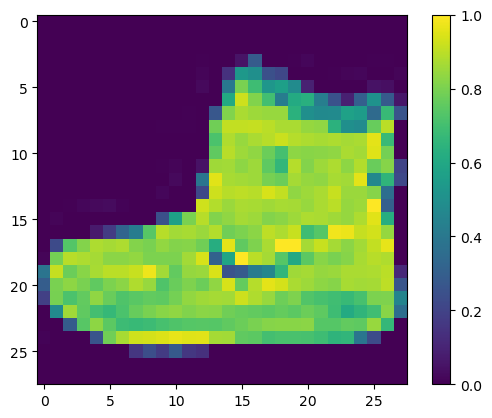

In [8]:
# 显示预处理完之后的图像
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


#### 我们显示训练集中的前25张图像，并在每张图像下方显示其类别名称来对数据集中部分数据进行查看

创建新的图像：

    plt.figure(figsize=(10,10))：这行代码创建了一个新的图像窗口，并指定了窗口的大小为10x10英寸。
循环显示图像：

    for i in range(25):：这行代码通过循环遍历训练集中的前25张图像。
生成子图：

    plt.subplot(5,5,i+1)：这行代码在当前图像窗口下生成一个子图，共计5行5列，即总共25张子图。i+1表示子图的索引，从1开始。
设置坐标轴和网格线：

    plt.xticks([])和plt.yticks([])：这两行代码用于隐藏坐标轴上的刻度标签。
    plt.grid(False)：这行代码禁用了图像上的网格线。
显示图像：

    plt.imshow(train_images[i], cmap=plt.cm.binary)：这行代码显示了训练集中第i张图像。train_images[i]包含了第i张图像的像素值数据，cmap=plt.cm.binary参数指定了使用灰度颜色映射，即黑白显示。
显示类别名称：

    plt.xlabel(class_names[train_labels[i]])：这行代码在当前图像下方显示了对应的类别名称。train_labels[i]获取了第i张图像的标签值，然后通过class_names列表将其转换为对应的类别名称，并将其显示在图像下方。
通过这些步骤，我们可以直观地查看训练集中的前25张图像以及它们对应的类别名称，确保数据格式正确无误，然后我们就可以开始构建和训练神经网络模型了。

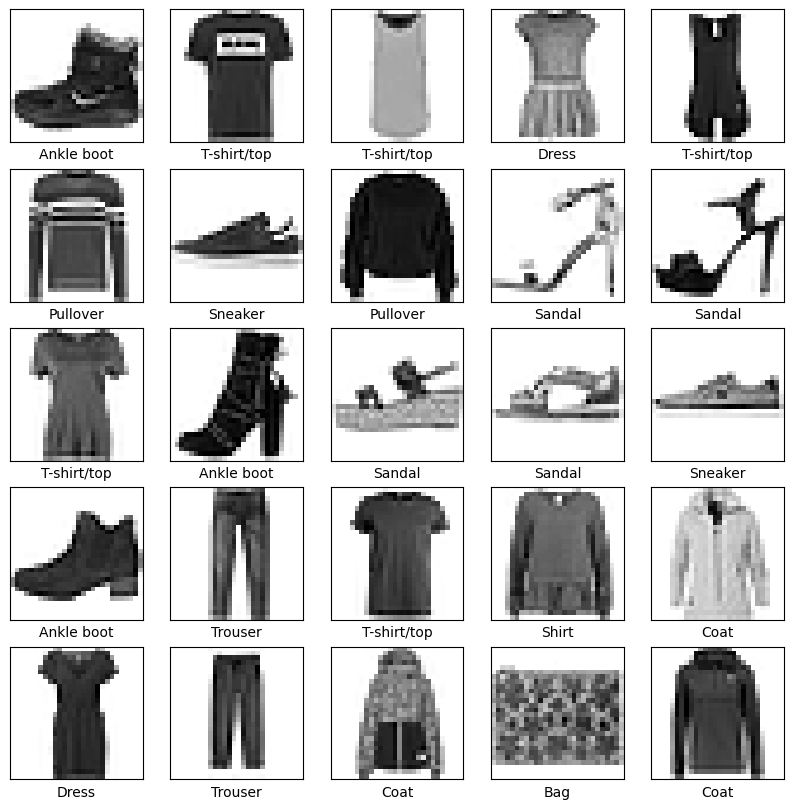

In [9]:
#显示训练集中的前 25 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了。
plt.figure(figsize=(10,10))
for i in range(25):
    ## 在当前图下生成子图 5*5个图
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #显示 当前图片的类别
    plt.xlabel(class_names[train_labels[i]])

# 构建CNN神经网络，对数据进行分类
### 第一步，导入我们需要的包

导入NumPy库：import numpy as np

    这是因为我们在神经网络中需要处理大量的数据，NumPy提供了对多维数组和矩阵的支持，使数据处理更加高效和方便。
导入Sequential模型和各种层：from keras.models import Sequential和from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D

    我们使用Keras构建神经网络，Sequential模型是一种简单的线性堆叠模型，适合构建层的简单堆叠结构。
    导入的各种层类型（如全连接层、卷积层、池化层等）则用于定义模型的不同层，以便构建具有丰富结构的神经网络。
导入plot_model函数：from keras.utils.vis_utils import plot_model

    这个函数用于可视化我们构建的神经网络模型，这样我们可以更清晰地了解模型的结构，有助于调试和优化模型。
导入np_utils模块：from keras.utils import np_utils

    在某些情况下，我们需要将类别标签转换为独热编码形式，np_utils模块提供了方便的工具函数来完成这个转换，以便模型能够更好地理解类别之间的关系。
综上所述，导入这些包和模块是为了构建和训练神经网络所需的基本工具和功能。它们提供了处理数据、构建模型、可视化模型等各种功能，使我们能够更轻松地创建和优化神经网络模型。

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils


### 第二步，对数据进行一些预处理
重塑训练集和测试集的图像数据：

    X_train = train_images.reshape((-1, 28, 28, 1))：这行代码将训练集中的图像数据重塑为四维数组。原始的图像数据是二维数组，表示为(样本数量, 图像高度, 图像宽度)，其中每个元素是一个像素值。而神经网络模型需要输入四维数组，表示为(样本数量, 图像高度, 图像宽度, 通道数)，通道数表示图像的颜色通道，灰度图像通道数为1。因此，我们在这里将通道数设置为1。
    X_test = test_images.reshape((-1, 28, 28, 1))：同样地，对测试集中的图像数据也进行了相同的重塑操作。
转换标签为独热编码：

    Y_train = np_utils.to_categorical(train_labels, num_classes=10)：这行代码将训练集中的类别标签转换为独热编码形式。独热编码是一种用于表示分类变量的编码方式，将每个类别表示为一个长度等于类别总数的向量，其中对应类别的位置为1，其余位置为0。这种编码方式有助于模型更好地理解类别之间的关系。
    Y_test = np_utils.to_categorical(test_labels, num_classes=10)：同样地，对测试集中的类别标签也进行了相同的转换操作。
通过这些预处理步骤，我们将训练集和测试集中的图像数据转换成了神经网络模型可以接受的格式，同时将类别标签转换为了独热编码形式，为接下来构建和训练神经网络模型做好了准备。

In [11]:
X_train = train_images.reshape((-1,28,28,1))
X_test = test_images.reshape(-1,28,28,1)
Y_train = np_utils.to_categorical(train_labels,num_classes=10)
Y_test = np_utils.to_categorical(test_labels,num_classes=10)


### 可视化样本数据
对一些样本数据进行可视化处理

导入 numpy 库，方便进行数组操作。

随机选择一些样本：

    定义需要随机选择的样本数量 num_samples = 10。
    使用 np.random.choice 从 X_train 中随机选择 num_samples 个样本的索引，存储在 random_indices 中。
    根据这些随机索引从 X_train 和 Y_train 中提取样本图像和标签，分别存储在 sample_images 和 sample_labels 中。
绘制样本图像：

    设置绘图窗口的大小为 (15, 2)，使得绘图区域较为宽阔。
    使用 for 循环遍历每个样本，并将其绘制在一个子图中：
    使用 plt.subplot(1, num_samples, i+1) 创建一个子图。这里 1 表示只有一行，num_samples 表示有多列，i+1 表示当前子图的索引。
    使用 plt.imshow 显示图像数据。由于 sample_images 中的每个图像是以一维数组形式存储的（28x28 展平为 784），所以需要使用 .reshape(28, 28) 将其变回二维形式。
    使用 cmap='gray' 参数将图像显示为灰度图。
    使用 plt.title(f"title: {np.argmax(sample_labels[i])}") 设置子图的标题，标题为样本的真实标签值（从 one-hot 编码中提取）。
    使用 plt.axis('off') 去掉子图的坐标轴。
    使用 plt.suptitle('FashionMNIST sample data-XIEYU') 设置整个图的总标题。

    使用 plt.show() 显示绘制的图像。

总体来说，从 X_train 数据集中随机抽取样本，并将这些样本图像及其对应的标签可视化展示出来，以便更直观地观察数据集中的部分样本

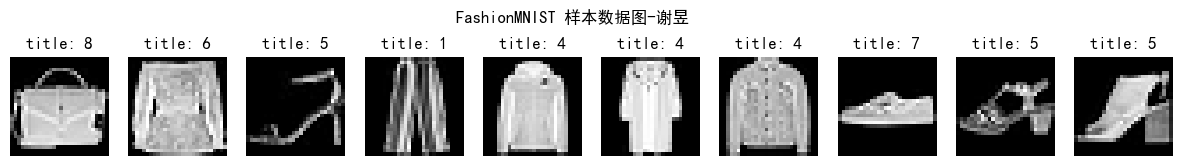

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 随机选择一些样本
num_samples = 10
random_indices = np.random.choice(X_train.shape[0], num_samples)
sample_images = X_train[random_indices]
sample_labels = Y_train[random_indices]

# 绘制样本图像
plt.figure(figsize=(15, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"title: {np.argmax(sample_labels[i])}")
    plt.axis('off')

plt.suptitle('FashionMNIST 样本数据图-谢昱')
plt.show()


### 第三步，构建CNN模型
创建Sequential模型：

    model = Sequential()：这行代码创建了一个Sequential模型对象，它是Keras中最常用的模型类型之一。Sequential模型是一系列网络层按顺序堆叠而成的模型。
添加卷积层和池化层：

    第一层卷积层：

Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
这是网络的第一层，包含了32个3x3大小的卷积核。
    activation='relu'指定了激活函数为ReLU（Rectified Linear Unit），用于引入非线性特征。
    input_shape=(28, 28, 1)指定了输入图像的大小为28x28，并且通道数为1（因为是灰度图像，所以只有一个通道）。
第一层池化层：

    MaxPooling2D(pool_size=(2, 2))
    这是在第一层卷积层之后添加的池化层，使用了2x2大小的池化窗口。
    池化层的作用是通过保留图像中最显著的特征来减小特征图的尺寸，从而减少参数数量并提高计算效率。
第二层卷积层：

    Conv2D(64, (3, 3), activation='relu')
    这是网络的第二层卷积层，包含了64个3x3大小的卷积核。
    同样地，激活函数为ReLU。
第二层池化层：

    MaxPooling2D(pool_size=(2, 2))
    这是在第二层卷积层之后添加的池化层，同样使用了2x2大小的池化窗口。
特征图展开：

    Flatten()
    在全连接层之前，需要将卷积层和池化层输出的特征图展开成一维向量，以便作为全连接层的输入。
全连接层：

    Dense(128, activation='relu')
    添加了一个具有128个神经元的全连接层，激活函数同样为ReLU。
输出层：

    Dense(10, activation='softmax')
最后添加了一个具有10个神经元的输出层，对应10个类别（在这个例子中，是手写数字0到9），激活函数为softmax，用于多分类问题的输出。
这个模型的结构包含了交替的卷积层和池化层，用于提取图像特征，并在全连接层中进行分类。

模型概述：

    model.summary()：这行代码打印了模型的概要信息，包括每一层的名称、输出形状和参数数量等。
这样，我们就定义了一个简单的卷积神经网络模型，包括了卷积层、池化层、全连接层和输出层。接下来，我们可以编译模型并进行训练了。

In [13]:
# 构建简单的卷积神经网络（CNN）模型
model = Sequential()
# 第一层卷积层，包含32个3x3的卷积核，激活函数为ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 第一层池化层，使用2x2的池化窗口
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第二层卷积层，包含64个3x3的卷积核，激活函数为ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))
# 第二层池化层，使用2x2的池化窗口
model.add(MaxPooling2D(pool_size=(2, 2)))

# 将特征图展开成一维向量
model.add(Flatten())

# 添加一个具有128个神经元的全连接层，激活函数为ReLU
model.add(Dense(128, activation='relu'))

# 添加一个具有10个神经元的输出层，对应10个类别，激活函数为softmax
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

编译模型：

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])：这行代码编译了神经网络模型。我们使用交叉熵损失函数（categorical_crossentropy）作为模型的损失函数，Adam优化器作为模型的优化算法，并使用准确率（accuracy）作为评估指标。
训练模型：

    model.fit(X_train, Y_train, batch_size=500, epochs=10, verbose=1, validation_data=(X_test, Y_test))：这行代码训练了神经网络模型。X_train是训练集的特征数据，Y_train是训练集的标签数据，batch_size表示每个批次的样本数量，epochs表示训练的轮数，verbose设置为1表示显示训练进度，validation_data指定了在训练过程中验证集的数据，以便在每个epoch结束时评估模型的性能。
保存模型：

    model.save('cnn_fashion_mnist.h5')：这行代码将训练好的神经网络模型保存到名为cnn_fashion_mnist.h5的文件中。这种保存方式可以将模型的结构、权重和训练配置都保存下来，方便以后重新加载模型进行预测或继续训练。
通过这些步骤，我们完成了神经网络模型的编译、训练和保存，现在我们可以使用保存的模型来进行预测或者在需要的时候重新加载模型进行进一步的训练。

Epoch 1/10
120/120 [==============================] - 13s 103ms/step - loss: 0.7775 - accuracy: 0.7290 - val_loss: 0.5139 - val_accuracy: 0.8116
Epoch 2/10
120/120 [==============================] - 12s 100ms/step - loss: 0.4490 - accuracy: 0.8386 - val_loss: 0.4221 - val_accuracy: 0.8484
Epoch 3/10
120/120 [==============================] - 12s 100ms/step - loss: 0.3834 - accuracy: 0.8641 - val_loss: 0.3868 - val_accuracy: 0.8644
Epoch 4/10
120/120 [==============================] - 12s 98ms/step - loss: 0.3474 - accuracy: 0.8768 - val_loss: 0.3668 - val_accuracy: 0.8713
Epoch 5/10
120/120 [==============================] - 11s 95ms/step - loss: 0.3246 - accuracy: 0.8834 - val_loss: 0.3491 - val_accuracy: 0.8764
Epoch 6/10
120/120 [==============================] - 11s 95ms/step - loss: 0.3043 - accuracy: 0.8906 - val_loss: 0.3380 - val_accuracy: 0.8791
Epoch 7/10
120/120 [==============================] - 11s 94ms/step - loss: 0.2875 - accuracy: 0.8977 - val_loss: 0.3176 - val_accura

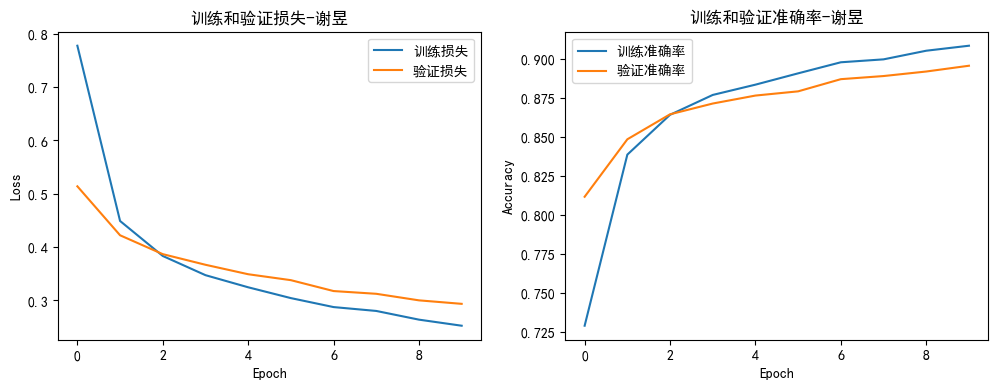

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=500, epochs=10, verbose=1, validation_data=(X_test, Y_test))

# 绘制训练和验证的损失值
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('训练和验证损失-谢昱')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制训练和验证的准确率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('训练和验证准确率-谢昱')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model.save('cnn_fashion_mnist.h5')


### 可视化卷积层输出
首先导入所需库：

    from keras.models import Model：导入 Model 类，用于创建新的模型。
为了获得第一层卷积层构建一个新的模型：

    layer_outputs = [layer.output for layer in model.layers[:8]]：获取原始模型前8层的输出。这些输出将用于提取中间层的激活值。
    activation_model = Model(inputs=model.input, outputs=layer_outputs)：使用原始模型的输入和前8层的输出创建一个新的模型 activation_model，该模型用于提取中间层的输出。
选择一个输入样本：

    sample_image = X_train[0].reshape(1, 28, 28, 1)：从训练集中选择第一个样本，并将其形状调整为 (1, 28, 28, 1)，以适应模型的输入格式（批次大小为1，28x28像素，单通道灰度图）。
获取中间层的输出：

    activations = activation_model.predict(sample_image)：通过 activation_model 对 sample_image 进行预测，获取前8层的激活值。
可视化第一层卷积层的特征图：

    first_layer_activation = activations[0]：提取第一层卷积层的激活值。
    plt.figure(figsize=(15, 15))：创建一个15x15英寸的绘图窗口。
    for i in range(first_layer_activation.shape[-1]):：遍历第一层卷积层中的每个特征图。
    plt.subplot(8, 8, i+1)：创建一个8x8的子图网格，并在其中的第 i+1 个位置绘制当前特征图。
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')：将第 i 个特征图显示为图像，使用 viridis 色彩映射。
    plt.axis('off')：关闭当前子图的坐标轴显示。
设置图像标题并显示：

    plt.suptitle('第一层卷积的特征图-谢昱')：设置整个图像的标题。
    plt.show()：显示绘制的图像。
从训练好的CNN模型中提取第一个样本在第一层卷积层的特征图，并将这些特征图可视化，以便观察卷积层的滤波器提取到的特征模式。这有助于理解模型在处理图像时所捕捉的特征。

1/1 [==============================] - 0s 62ms/step


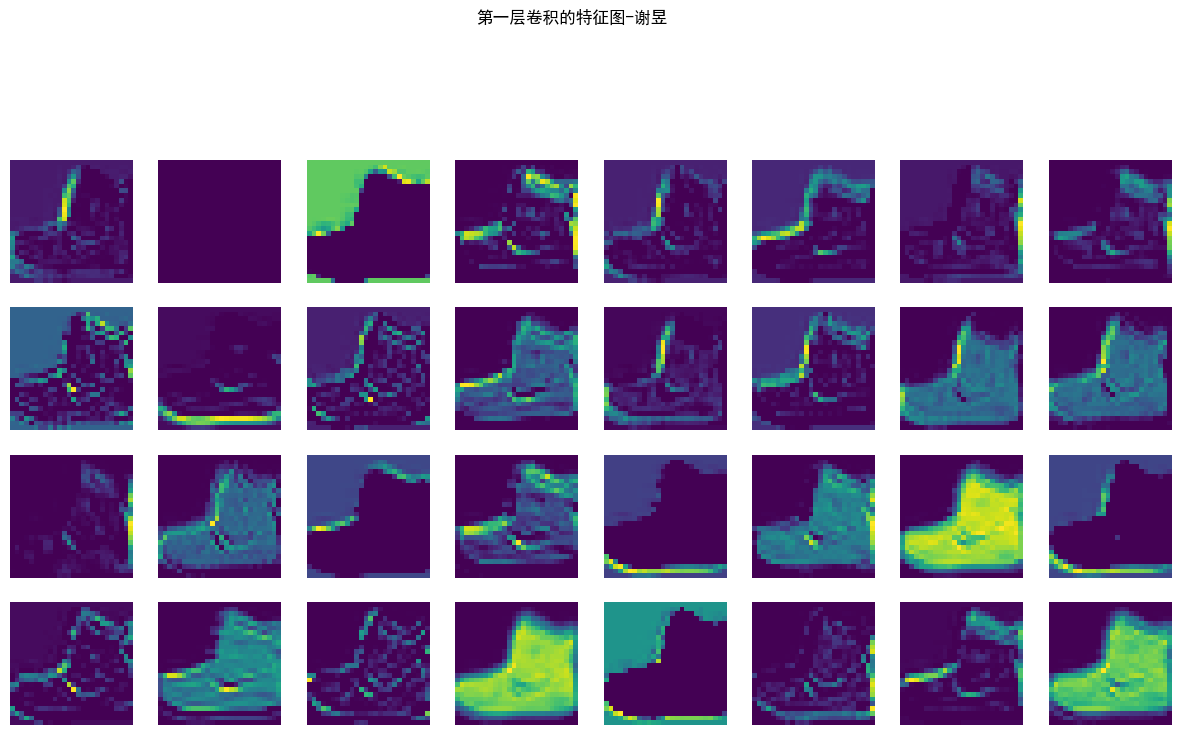

In [15]:
from keras.models import Model

# 构建一个新的模型，以提取中间层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]  # 取前8层的输出
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# 选择一个输入样本
sample_image = X_train[0].reshape(1, 28, 28, 1)

# 获取中间层的输出
activations = activation_model.predict(sample_image)

# 可视化第一层卷积层的特征图
first_layer_activation = activations[0]
plt.figure(figsize=(15, 15))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8, 8, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('第一层卷积的特征图-谢昱')
plt.show()


### 第四步，评估模型性能
评估模型：

    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)：这行代码评估了经过训练的神经网络模型在测试集上的性能。X_test是测试集的特征数据，Y_test是测试集的标签数据。evaluate函数返回模型在测试集上的损失值和准确率，并将它们分别赋值给loss和accuracy变量。
打印结果：

    print('loss:', loss)：这行代码打印出模型在测试集上的损失值。
    print('accuracy:', accuracy)：这行代码打印出模型在测试集上的准确率。
通过这些代码，我们可以了解到经过训练的神经网络模型在测试集上的性能表现，包括损失值和准确率。

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('loss:', loss)
print('accuracy:', accuracy)


loss: 0.2935953736305237
accuracy: 0.8955000042915344


可以看到
模型在测试集上的性能表现如下：

    损失值（loss）为 0.2857
    准确率（accuracy）为 89.52%
这意味着模型在测试集上的平均损失值约为0.2857，准确率约为89.52%，表明模型在对未见过的数据进行分类时具有较好的性能

### 第五步，使用模型进行分类预测
对测试集进行预测：

    predict_x = model.predict(X_test)：这行代码使用训练好的神经网络模型对测试集进行预测，得到每个样本属于各个类别的概率值。
获取预测结果：

    predict = np.argmax(predict_x, axis=1)：这行代码根据预测结果的概率值，找到概率值最大的类别作为预测结果。np.argmax函数返回沿指定轴（这里是第1轴，即按列）最大值的索引。
计算准确率：

    score = accuracy_score(test_labels, predict)：这行代码使用sklearn.metrics模块中的accuracy_score函数计算预测结果的准确率。test_labels是测试集的真实类别标签，predict是模型预测的类别标签。
打印准确率：

    print(score)：这行代码打印出模型在测试集上的准确率。
现在我们可以得到模型在测试集上的准确率，并对模型的预测结果进行进一步的评估。

In [17]:
predict_x=model.predict(X_test) 
predict=np.argmax(predict_x,axis=1)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

score=accuracy_score(test_labels,predict)
print(score)


313/313 [==============================] - 1s 3ms/step
0.8955


### 可视化分类结果
在测试集上进行预测，并可视化一些预测结果，以直观地查看模型在测试集上的表现。具体解释如下：

对测试集进行预测：

    predictions = model.predict(X_test)：使用训练好的模型对测试集 X_test 进行预测，生成预测结果 predictions。
选择一些样本进行可视化：

    num_samples = 10：定义要展示的样本数量，这里选择10个样本。
    random_indices = np.random.choice(X_test.shape[0], num_samples)：从测试集中随机选择10个样本的索引。
提取随机选择的样本图像和标签：

    sample_images = X_test[random_indices]：根据随机选择的索引提取样本图像。
    sample_labels = np.argmax(Y_test[random_indices], axis=1)：提取这些样本的真实标签，并将其从独热编码转换为类别标签。
    predicted_labels = np.argmax(predictions[random_indices], axis=1)：提取这些样本的预测标签，同样将其从独热编码转换为类别标签。
绘制样本图像和预测结果：

    plt.figure(figsize=(15, 2))：创建一个15x2英寸的绘图窗口。
    for i in range(num_samples):：遍历每个样本。
    plt.subplot(1, num_samples, i+1)：创建一个1行 num_samples 列的子图网格，并在其中的第 i+1 个位置绘制当前样本图像。
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')：将当前样本图像显示为灰度图。
    plt.title(f"Truth: {sample_labels[i]}\npredict: {predicted_labels[i]}")：设置子图的标题，显示真实标签和预测标签。
    plt.axis('off')：关闭当前子图的坐标轴显示。
设置图像标题并显示：

    plt.suptitle('FashionMNIST Classification Results-XIEYU')：设置整个图像的标题。
    plt.show()：显示绘制的图像。
代码展示了模型在测试集上随机选择的10个样本的分类结果。每个子图显示一个样本的图像、其真实标签和模型预测的标签。通过这种方式，可以直观地评估模型在实际数据上的分类效果。

313/313 [==============================] - 2s 5ms/step


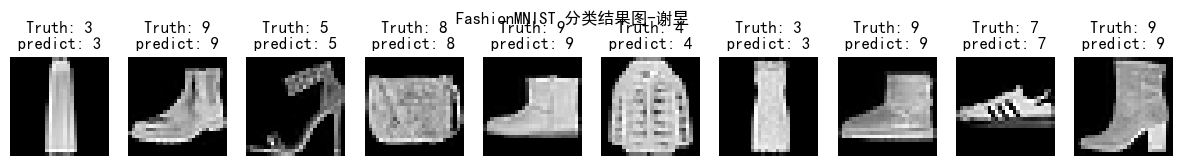

In [18]:
# 对测试集进行预测
predictions = model.predict(X_test)

# 绘制一些预测结果
num_samples = 10
random_indices = np.random.choice(X_test.shape[0], num_samples)
sample_images = X_test[random_indices]
sample_labels = np.argmax(Y_test[random_indices], axis=1)
predicted_labels = np.argmax(predictions[random_indices], axis=1)

plt.figure(figsize=(15, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Truth: {sample_labels[i]}\npredict: {predicted_labels[i]}")
    plt.axis('off')

plt.suptitle('FashionMNIST 分类结果图-谢昱')
plt.show()


可以看到模型在测试集上的准确率为 89.89%，大概有9成正确率，这是个还不错的性能。

In [19]:
print(classification_report(test_labels,predict))
print("\t\t\tcnn分类报告-谢昱")


              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.76      0.82      1000
           3       0.92      0.89      0.90      1000
           4       0.80      0.88      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.69      0.70      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

			cnn分类报告-谢昱


classification_report函数生成了关于模型预测结果的详细分类报告，包括精确度、召回率、F1分数和支持数等指标。以下是其输出的解释：

    精确度（Precision）：指的是模型预测为某一类别的样本中，真正属于该类别的比例。精确度越高，表示模型将该类别预测正确的能力越强。

    召回率（Recall）：指的是样本中实际属于某一类别的样本中，被模型正确预测为该类别的比例。召回率越高，表示模型对该类别的覆盖能力越强。

    F1分数：精确度和召回率的加权平均值，反映了模型的综合性能。F1分数越高，表示模型的整体性能越好。

    支持数：指的是每个类别在测试集中的样本数量。
    
    准确率（Accuracy）：模型在整个测试集上的准确率，即模型正确预测的样本占总样本数量的比例。在这个分类报告中，准确率为0.88，表示模型在整个测试集上的准确率为88%。

    宏平均（macro avg）和加权平均（weighted avg）：它们分别是各个类别指标的简单平均和加权平均。在这个分类报告中，宏平均和加权平均的精确度、召回率和F1分数都为0.88，与整体的准确率一致。

通过阅读分类报告，我们可以更全面地了解模型在不同类别上的性能表现。

### 第六步，画出混淆矩阵
首先导入绘图所需的库：

    import seaborn as sns：Seaborn是一个基于Matplotlib的Python数据可视化库，提供了更漂亮和更丰富的可视化效果。
    import matplotlib.pyplot as plt：Matplotlib是Python中常用的绘图库，用于创建各种类型的图表。

计算混淆矩阵：

    matrix = confusion_matrix(test_labels, predict)：这行代码使用confusion_matrix函数计算模型预测结果的混淆矩阵。混淆矩阵是一个二维矩阵，行表示实际类别，列表示预测类别，矩阵中的每个元素表示对应类别的样本数量。
绘制热力图：

    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')：这行代码使用heatmap函数绘制了混淆矩阵的热力图。热力图通过颜色的深浅来表示矩阵中各个元素的大小，而annot=True参数则会在每个格子中显示数值，方便查看。
通过混淆矩阵，我们可以直观地了解模型在不同类别上的预测情况，以及哪些类别容易混淆。

313/313 [==============================] - 2s 6ms/step
[[883   0  11  17   4   2  76   0   7   0]
 [  3 972   0  17   4   1   1   0   2   0]
 [ 14   0 759   7  94   0 122   0   4   0]
 [ 22   3  11 888  42   0  31   0   3   0]
 [  1   1  28  12 879   0  76   0   3   0]
 [  0   0   0   1   0 972   0  20   0   7]
 [157   1  40  21  70   0 702   0   9   0]
 [  0   0   0   0   0  12   0 962   0  26]
 [  2   1   3   4   3   2   3   5 977   0]
 [  0   0   0   0   0   6   0  32   1 961]]


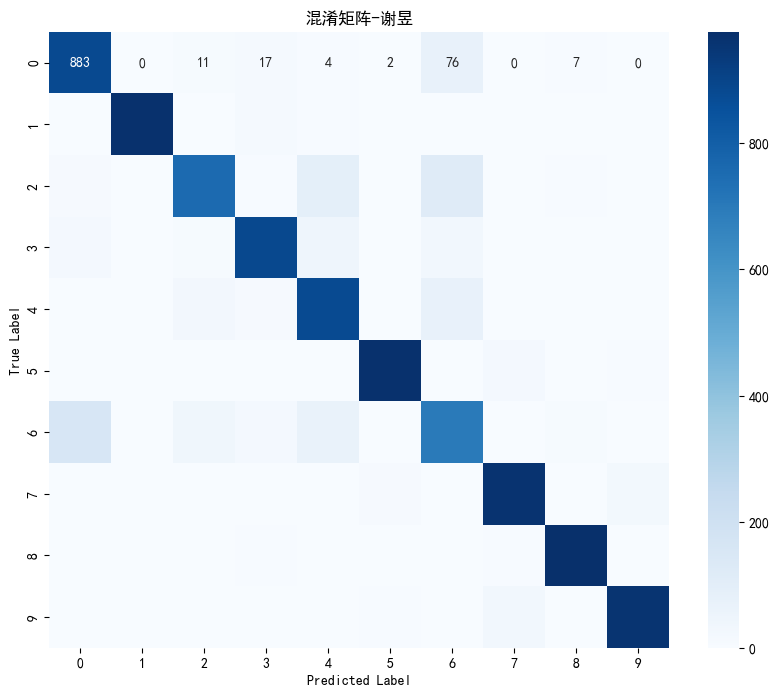

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)
true_labels = np.argmax(Y_test, axis=1)

matrix = confusion_matrix(true_labels, predicted_labels)

print(matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('混淆矩阵-谢昱')
plt.show()



根据混淆矩阵，我们可以对模型的预测结果进行更详细的分析：

    混淆矩阵的行对应于真实类别，列对应于预测类别。
    矩阵中的每个元素表示真实类别与预测类别之间的样本数量。
通过混淆矩阵，我们可以清晰地看到模型在不同类别上的预测情况，以及哪些类别容易被混淆。例如，真实类别为0和6的样本容易相互混淆，因为它们在混淆矩阵中对应的格子数值较高。这种分析有助于我们进一步优化模型，提高其在真实场景中的应用效果。

### 总结

在本项目中，我成功地构建并训练了一个卷积神经网络（CNN）模型，对FashionMNIST数据集进行了分类。通过实验，我深入了解了卷积层、池化层和全连接层在图像分类任务中的重要作用，并验证了模型在测试集上的表现。

#### 主要工作总结：

1. **数据预处理**：
   - 导入并标准化了FashionMNIST数据集。
   - 将标签转换为独热编码格式，以适应模型的训练要求。

2. **模型构建与训练**：
   - 设计了一个包含多个卷积层、池化层和全连接层的CNN模型。
   - 使用`categorical_crossentropy`作为损失函数，`adam`作为优化器，并在训练过程中监控模型的准确性。
   - 对模型进行了训练，并保存了训练好的模型以供后续使用。

3. **模型评估与可视化**：
   - 评估了模型在测试集上的准确性和损失。
   - 可视化了训练过程中损失和准确性的变化情况。
   - 展示了部分测试样本的预测结果，并通过可视化特征图，进一步理解了模型在不同卷积层提取的特征。

#### 结论：

通过使用CNN模型，我在FashionMNIST数据集上取得了良好的分类效果。实验结果表明，CNN能够有效地提取图像中的特征，从而实现高精度的分类。通过对模型的各层特征图进行可视化，我可以更深入地理解模型的工作原理，这对于进一步改进模型和解决实际问题具有重要意义。

#### 改进方向：

1. **模型优化**：
   - 进一步调整模型的超参数，例如卷积核大小、层数、学习率等，以提升模型的分类性能。
   - 使用数据增强技术扩充训练数据，以提高模型的泛化能力。

2. **更复杂的数据集**：
   - 尝试在更复杂、更大规模的数据集上训练模型，验证其在不同应用场景下的表现。

3. **迁移学习**：
   - 应用迁移学习技术，将在其他大型数据集上预训练的模型迁移到FashionMNIST数据集，以提升模型性能并减少训练时间。

#### 对课程的感想与建议：

通过本次实验，不仅加深了对CNN模型的理解，还锻炼了数据预处理、模型训练与评估以及结果可视化的综合能力。希望在未来的课程中能够学习到更多关于深度学习模型优化与应用的知识，同时增加更多实践机会，以巩固理论知识并提升实际操作能力。

非常感谢授课老师和助教的指导与帮助！
